#### Prepared by:      
Raja BEN HARRAF     
#### framed by:
Mohammed Yasin Shah

## Project Description
The last ten years have seen an increase in the total number of traffic-related deaths in every  US state. 
there are many variations between states. Now we want to understand if there are patterns in this variation
in order to derive suggestions for a policy action plan. In particular, instead of implementing an expensive
national plan, we want to focus on groups of states with similar profiles.
How can we find these clusters statistically reliably and communicate the result effectively?

## Project Tasks
1. The raw data files and their format
2. Read in and get an overview of the data
3. Create a textual and a graphical summary of the data
4. Quantify the association of features and accidents
5. Fit a multivariate linear regression
6. Perform PCA on standardized data
7. Visualize the first two principal components
8. Find clusters of similar states in the data
9. KMeans to visualize clusters in the PCA scatter plot

## 1. The raw data files and their format

We will retrieve the project directory path and list the files of our datasets

In [1]:
import os
# get the current directory path
path = os.getcwd()
print("Le répertoire courant est : " + path)
# get the name of the current directory
repn = os.path.basename(path)
print("Le nom du répertoire est : " + repn)

Le répertoire courant est : C:\Users\hp\mini project 1
Le nom du répertoire est : mini project 1


In [2]:
#list datasets
from glob import glob
print(glob(os.path.join("*.csv")))


['miles-driven.csv', 'road-accidents.csv']


## 2. Read in and get an overview of the data

In this step we will read data and display the first 5 columns and some information on each column

In [3]:
# Read in `road-accidents.csv`
import pandas as pd
road_accidents = pd.read_csv("C://Users//hp//mini project 1//road-accidents.csv",comment = '#', sep = '|')

# Save the number of rows columns as a tuple
rows_and_cols = road_accidents.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Display the first five rows of the DataFrame
road_accidents.head()


There are 51 rows and 5 columns.



,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [4]:
# Generate an overview of the DataFrame
car_acc_information = road_accidents.info()
print(car_acc_information)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


## 3. Create a textual and a graphical summary of the data

#### Describe():
To find the statistics for each column, we will use the describe() method. this function allows to return the statistics summary of all the columns of the data frame.


In [5]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `road_accidents` DataFrame
sum_stat_car = road_accidents.describe()
print(sum_stat_car)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


#### pairplot :
The following code shows how to create a pairs plot for every numeric variable in the seaborn dataset 

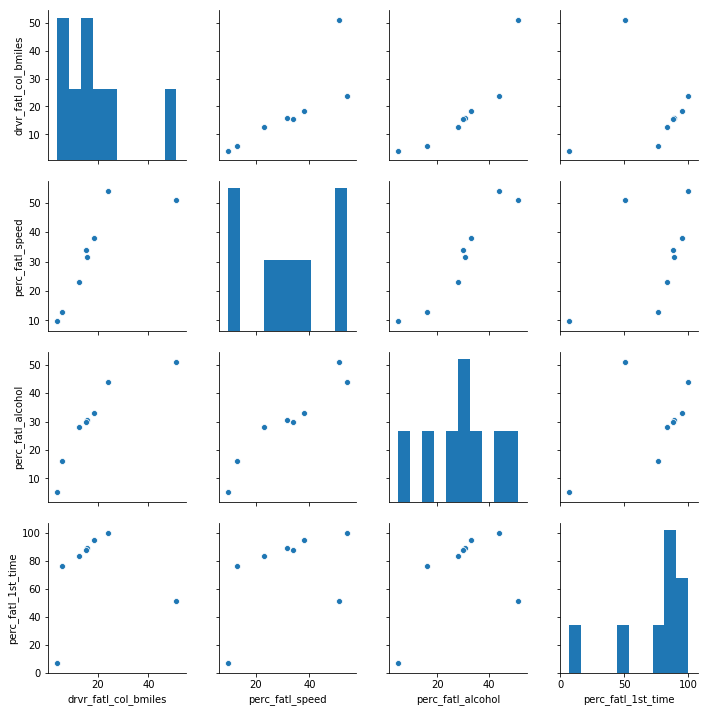

In [6]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(sum_stat_car)

## 4. Quantify the association of features and accidents

Now we will test the relationship between the variables at the same time we will use the correlation matrix
#### dataframe.corr() :
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [8]:
# Compute the correlation coefficent for all column pairs
corr_columns = road_accidents.corr()
print("The correlation DataFrame is:")
corr_columns

The correlation DataFrame is:


,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


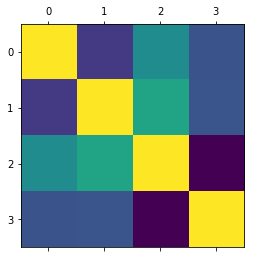

In [23]:
import matplotlib.pyplot as plt
corr_df = corr_columns.corr(method='pearson')
plt.matshow(corr_df)
plt.show()

It plots the correlation matrix generated from the DataFrame employee_df using the heatmap() function in the seaborn package
production

production :


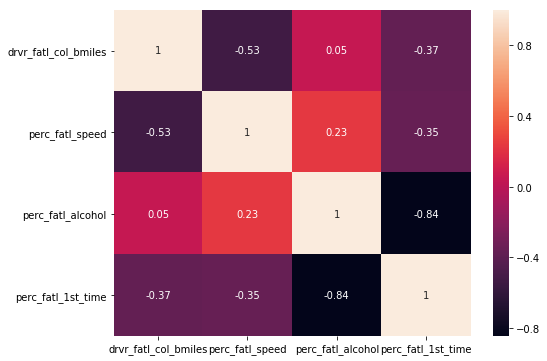

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
print("production :")
plt.show()

## 5. Fit a multivariate linear regression

#### Multiple Linear Regression
Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship
It has two or more independent variables (X) and one dependent variable (Y), where Y is the value to be predicted. Thus, it is an approach for predicting a quantitative response using multiple features.

Equation: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e

Y = Dependent variable / Target variable
β0 = Intercept of the regression line

β1, β2, β3, …. βn = Slope of the regression line which tells whether the line is increasing or decreasing

X1, X2, X3, ….Xn = Independent variable / features

e = Error

In [27]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = road_accidents[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = road_accidents['drvr_fatl_col_bmiles']

# Create a linear regression object 
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

## 6. Perform PCA on standardized data

### PCA
the PCA has to visualize the data in a reduced dimensional space where we can try to detect patterns with the naked eye

In [41]:
#librairies:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#creating an instance of the PCA class:
model_acp=PCA()

#data model application:
features_model = model_acp.fit_transform(features)
features_model

array([[  7.1411757 ,  -7.55229146,   4.63574677],
       [  7.83817655,   7.4086459 ,   5.46311796],
       [  2.53316505,   7.97326   ,   0.93122389],
       [-14.49958192,   6.28291258,  -0.08280585],
       [  2.6587585 ,   1.30028368,   3.04205628],
       [  4.50952989,   7.17537755,   1.607512  ],
       [ 15.17205428,  -6.85332902,  -0.26491041],
       [  5.82106773,  10.48237288,  -1.28102576],
       [  1.28013887,  12.00060635,   0.4725227 ],
       [-10.93786452,   4.68697917,  -2.02372463],
       [-13.68653365,   4.74596483,   1.6425185 ],
       [ 23.92627152,  -2.92490267,  -4.94798065],
       [  3.6785397 ,   9.66560763,  -0.41935983],
       [  4.72465871,   6.29945812,  -4.49056021],
       [ -7.0389606 ,   5.95106127,  -1.57579085],
       [-15.53730504,  -1.12912903,   3.07706278],
       [ -5.91135363,  -1.9667773 ,   6.48871997],
       [-13.78561506, -10.87600085,   8.63854388],
       [  3.50751637,   8.42023981,  -4.34616643],
       [  6.09019655,  -3.81686

In [46]:
#attribute of the PCA model to find the quantity explained for each component
model_acp.explained_variance_

array([95.70596236, 51.20492547, 20.67499452])

In [45]:
#attribute of the PCA model to find the percentage of variance explained for each component
model_acp.explained_variance_ratio_

array([0.57108607, 0.30554439, 0.12336955])

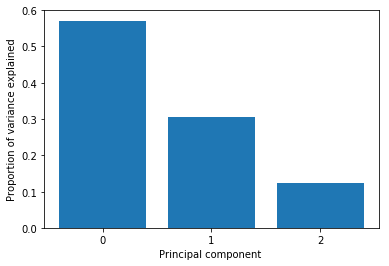

In [54]:
#visualization of the percentage of variance explained by each component:
import matplotlib.pyplot as plt
plt.bar(range(model_acp.n_components_),  model_acp.explained_variance_ratio_)
plt.xlabel('Principal component ')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(model_acp.n_components_))
plt.show()

In [55]:
#attribute to find the main components at each axis
model_acp.components_

array([[ 0.97921146,  0.20204703, -0.01794192],
       [ 0.07769994, -0.29191697,  0.95328233],
       [ 0.18737032, -0.93485907, -0.30154748]])

## 7. Visualize the first two principal components

We will create a point cloud of the first principal components

Text(0, 0.5, 'Second Principal component')

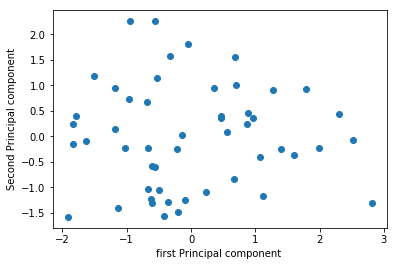

In [56]:
# Transform the scaled features using two principal components
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)
plt.xlabel('first Principal component ')
plt.ylabel('Second Principal component')

## 8. Find clusters of similar states in the data

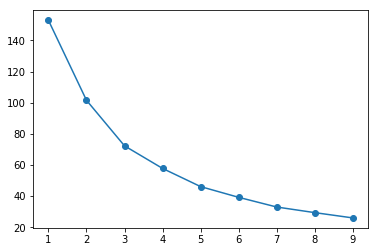

In [57]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

## 9. KMeans to visualize clusters in the PCA scatter plot

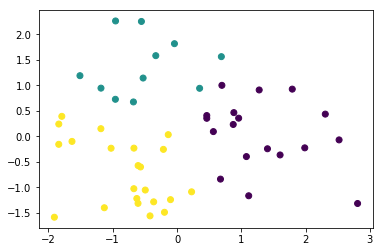

In [58]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters = 3, random_state = 8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c = km.labels_)